<a href="https://colab.research.google.com/github/JohnFarlander/ML_Practicals/blob/main/BML_LCA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Dataset Loaded Successfully from Google Drive

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null  

/tmp/ipython-input-3248035353.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='y', palette='coolwarm')


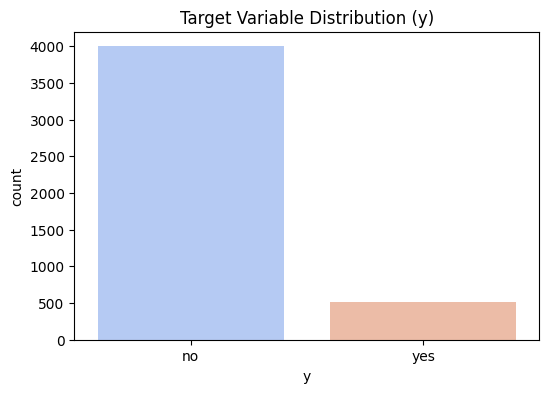

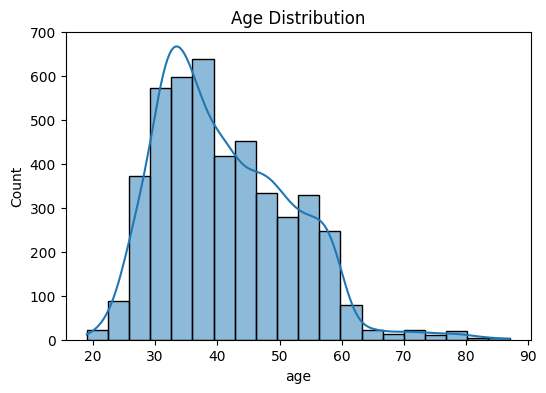

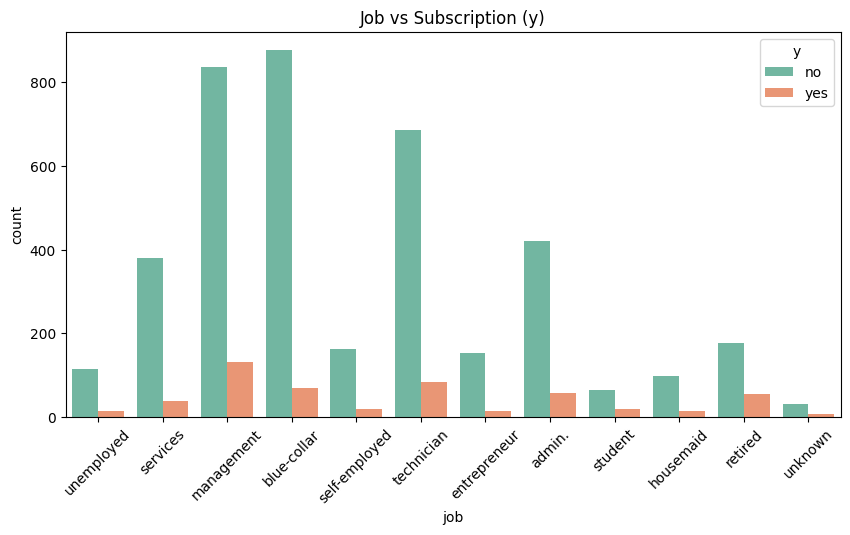


🎯 Model Accuracy: 0.8283

✅ EDA and Accuracy Evaluation Completed Successfully.


In [8]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Step 3: Load Dataset from Google Drive
file_path = "/content/drive/MyDrive/Kaggle/bank.csv"
df = pd.read_csv(file_path, sep=';')
print("✅ Dataset Loaded Successfully from Google Drive")

# Step 4: EDA (Exploratory Data Analysis)
print("\n--- Dataset Info ---")
print(df.info())
print("\n--- Missing Values ---")
print(df.isnull().sum())
print("\n--- Basic Statistics ---")
print(df.describe())

# Plot 1: Target variable distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='y', palette='coolwarm')
plt.title("Target Variable Distribution (y)")
plt.show()

# Plot 2: Age distribution
plt.figure(figsize=(6,4))
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

# Plot 3: Job vs Subscription
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='job', hue='y', palette='Set2')
plt.xticks(rotation=45)
plt.title("Job vs Subscription (y)")
plt.show()

# Step 5: Data Preprocessing
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Step 6: Split Data & Train Model
X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
model = GaussianNB()
model.fit(X_train, y_train)

# Step 7: Evaluate Accuracy
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"\n🎯 Model Accuracy: {acc:.4f}")
print("\n✅ EDA and Accuracy Evaluation Completed Successfully.")
